In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/AML/aml-project

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/AML/aml-project


In [0]:
! git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/belerico/aml-project
   7d1bbe0..6bfbff2  master     -> origin/master
Updating 7d1bbe0..6bfbff2
Fast-forward
 train_embeddings.py | 75 ++++++++++++++++++++++++++++++++++++++++++++---------
 1 file changed, 63 insertions(+), 12 deletions(-)


In [3]:
!pip install pyGPGO
!pip install pyDOE
!pip install tensorflow==2.0 keras==2.3.1
!pip install --pre -U matplotlib
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

  Created wheel for pyGPGO: filename=pyGPGO-0.4.0.dev1-cp36-none-any.whl size=19866 sha256=496e5683ee4a57f9afae33d945006d3b2955cb111b8e44c21c794b4884b5d084
  Stored in directory: /root/.cache/pip/wheels/d1/27/04/c4fa3bfe194d36e3cd51542132f43415a6813114a5e8301acb
Successfully built pyGPGO
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp36-none-any.whl size=18178 sha256=f3a3c850827b6dd2848bc84fc0b4419619a83a3b38bf9d54ae8341d71e34131f
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pyDOE
     |████████████████████████████████| 86.3MB 74kB/s 
     |████████████████████████████████| 378kB 49.0MB/s 
     |████████████████████████████████| 3.8MB 50.5MB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement 

     |████████████████████████████████| 12.4MB 7.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
%cd drive/My\ Drive/AML/aml-project

/content/drive/My Drive/AML/aml-project


# Redifine \_firstRun method of the class GPGO to allow custom initial configuration

In [0]:
def myFirstRun(self, init_rand_configs=None, n_eval=3):
    """
    Performs initial evaluations before fitting GP.

    Parameters
    ----------
    init_rand_configs: list
        Initial random configurations
    n_eval: int
        Number of initial evaluations to perform. Default is 3.

    """
    if init_rand_configs is None:
      self.X = np.empty((n_eval, len(self.parameter_key)))
      self.y = np.empty((n_eval,))
      for i in range(n_eval):
          s_param = self._sampleParam()
          s_param_val = list(s_param.values())
          self.X[i] = s_param_val
          self.y[i] = self.f(**s_param)
    else:
      self.X = np.empty((len(init_rand_configs),len(init_rand_configs[0])))
      self.y = np.empty((len(init_rand_configs),))
      self.init_evals = len(self.y)
      for i in range(len(init_rand_configs)):
        self.X[i] = list(init_rand_configs[i].values())
        self.y[i] = self.f(**init_rand_configs[i])
    self.GP.fit(self.X, self.y)
    self.tau = np.max(self.y)
    if init_rand_configs is None: 
      self.history.append([init_rand_configs[np.argmax(self.y)], self.tau])
    else:
      idx_max_param = np.argmax(self.y)
      self.history.append([{key: self.X[idx_max_param, idx] for idx, key in enumerate(self.parameter_key)}, self.GP.y[-1], self.tau])

# Override updateGP method of the class GPGO to allow saves also for the acquired points

In [0]:
def myUpdateGP(self):
  """
  Updates the internal model with the next acquired point and its evaluation.
  """
  kw = {param: int(self.best[i]) if self.parameter_type[i] == 'int' else float(self.best[i])
        for i, param in enumerate(self.parameter_key)}
  f_new = self.f(**kw)
  self.GP.update(np.atleast_2d(self.best), np.atleast_1d(f_new))
  self.tau = np.max(self.GP.y)
  self.history.append([kw, self.GP.y[-1], self.tau])

# AUTOML

AUTOml for our model

### Generate random initial configuration

In [0]:
from pyDOE import lhs
from scipy.stats.distributions import uniform

# initial (intelligent) random configurations
configs = lhs(6, samples=5)
# Hyparameters to start from: (not using pretrained embedding)
# [lr, embedding_dim, rnn_units, convs_depth, convs_filter_dim, denses_depth]
locs = [0.0001, 100, 100, 1, 2, 1]
scales = [1, 250, 250, 3, 4, 3]
init_rand_configs = []
for i in range(len(locs)):
  configs[:, i] = uniform(loc=locs[i], scale=scales[i]-locs[i]).ppf(configs[:, i])
init_rand_configs = [{'lr': config[0], 'momentum': config[1]} for config in configs]
init_rand_configs

[{'lr': 0.6769647608901856, 'momentum': 101.30510569157443},
 {'lr': 0.06599173519110922, 'momentum': 238.84973034643716},
 {'lr': 0.8301220088242047, 'momentum': 192.36360651516725},
 {'lr': 0.3506209310339308, 'momentum': 188.21717743871818},
 {'lr': 0.5243568213530652, 'momentum': 147.5667542318871}]

### Define fitness function

In [4]:
import keras.optimizers
from dataset import get_data, get_wdc_data
from fitness import fit
import utils
import json
from utils import get_pretrained_embedding

Using TensorFlow backend.


In [5]:
import gc
gc.collect()

7

In [0]:
config = {
    'train_path' : './dataset/computers/train/computers_splitted_train_medium.json',
    'valid_path' : './dataset/computers/valid/computers_splitted_valid_medium.json',
    'test_path' : "./dataset/computers/test/computers_gs.json",
    'EXP_DIR' : 'data/exps/exp15',
    'PRETRAINED_EMBEDDING_PATH' : './dataset/embeddings/w2v/w2v_title_300Epochs_1MinCount_9ContextWindow_200d.txt',
    'NUM_WORDS' : None,
    'MAX_LEN': 20,
    'BATCH_SIZE' : 32,
    'EMBEDDING_DIM' : 200,
    'RNN_UNITS' : 200,
    'EARLY_STOPPING' : 10,
    'EPOCHS' : 20,
    'TRAINABLE':False
}

In [0]:
def get_fitness_for_automl(config):
  train_gen, val_gen, test_gen, class_weights = get_wdc_data(
            config['train_path'],
            config['valid_path'],
            config['test_path'],
            word_index_path="dataset/title_word_index.json",
            num_words=config['NUM_WORDS'],
            max_len=config['MAX_LEN'],
            batch_size=config['BATCH_SIZE'],
            preprocess_data=True,
            preprocess_method="nltk",
        )
  word_index = json.loads(open("dataset/title_word_index.json").read())
  NUM_WORDS = len(word_index) if config['NUM_WORDS'] is None else NUM_WORDS
  print("* NUM WORDS: ", NUM_WORDS)
  print("* CLASS WEIGHTS:", class_weights)

  embedding_matrix = None
  if config['PRETRAINED_EMBEDDING_PATH'] is not None:
      embedding_matrix = get_pretrained_embedding(
          config['PRETRAINED_EMBEDDING_PATH'], NUM_WORDS + 1, 
          config['EMBEDDING_DIM'], word_index
      )

  def fitness(
      lr=0.001,
      embedding_dim=150,
      embedding_dropout=0.3, 
      rnn_units=100,
      convs_filter_banks=4,
      convs_kernel_size=2,
      pool_size=2,
      denses_depth=3,
      mlp_dropout=0.3,  
      optimizer_type='adam', 
      similarity_type=0):
    
    optimizer = getattr(keras.optimizers, optimizer_type)(lr=lr)
    matrix_similarity_function = getattr(utils, 'dot_similarity' if similarity_type == 0 else 'cosine_similarity')
    model, results = fit(
        train_gen,
        val_gen,
        NUM_WORDS,
        config['EMBEDDING_DIM'],
        config['MAX_LEN'],
        matrix_similarity_function,
        config['EXP_DIR'],
        config['EARLY_STOPPING'],
        denses_depth=denses_depth,
        activation="sigmoid",
        embedding_matrix=embedding_matrix,
        embedding_trainable=config['TRAINABLE'],
        embedding_dropout=embedding_dropout,
        rnn_type="LSTM",
        rnn_units=rnn_units,
        convs_filter_banks=convs_filter_banks,
        convs_kernel_size=convs_kernel_size,
        pool_size=pool_size,
        mlp_dropout=mlp_dropout,
        epochs=config['EPOCHS'],
        verbosity=1,
        callbacks=False,
        class_weights=None,
        optimizer=None
    )
    return results[3]
  return fitness

### ExpectedImprovement

In [8]:
import numpy as np
import functools

from pyGPGO.covfunc import squaredExponential
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
from pyGPGO.acquisition import Acquisition

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D 
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
    
furtherEvaluations = 10
# param = {'lr': ('cont', [0.01,0.1]),'momentum': ('cont', [0.1,0.9])} 
 
param = {
    'lr': ('cont', [0.00001, 1.0]),
    'rnn_units': ('int', [150, 250]),
    'similarity_type': ('int', [0, 1]),
    'convs_filter_banks': ('int', [4, 64]),
    'convs_kernel_size': ('int', [2, 4]),
    'pool_size': ('int', [2, 4]),
    'denses_depth': ('int', [1, 6]),
} 

init_rand_configs = [{
    'lr':0.0001,
    'rnn_units':200,
    'similarity_type': 1,
    'convs_filter_banks':32,
    'convs_kernel_size':3,
    'pool_size':2,
    'denses_depth':3,
}] 

# creating a GP surrogate model with a Squared Exponantial covariance function,
# aka kernel
sexp = squaredExponential()
sur_model = GaussianProcess(sexp)
fitness = get_fitness_for_automl(config)
# setting the acquisition function
acq = Acquisition(mode="ExpectedImprovement")

# creating an object Bayesian Optimization
bo_step1_expected = GPGO(sur_model,acq,fitness,param,n_jobs=1)
bo_step1_expected._firstRun = functools.partial(myFirstRun, bo_step1_expected)
bo_step1_expected.updateGP = functools.partial(myUpdateGP, bo_step1_expected)
bo_step1_expected._firstRun(init_rand_configs=init_rand_configs)
bo_step1_expected.logger._printInit(bo_step1_expected)

* PREPROCESS DATA
* DONE
* FOUND 4362 unique vocabs
* PREPROCESS DATA
* DONE
* FOUND 3444 unique vocabs
* PREPROCESS DATA
* DONE
* FOUND 2791 unique vocabs
* NUM WORDS:  4764
* CLASS WEIGHTS: [0.63919052 2.29609929]
* LOADING EMBEDDINGS MATRIX
* FOUND 4764 WORD VECTORS
* FOUND 4764 vector representations out of 4765 words
Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embeddi

In [0]:
bo_step1_expected.run(furtherEvaluations, resume=True)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot([val[1] for val in bo_step1_expected.history], marker="o")
plt.subplot(1, 2, 2)
plt.plot([val[2] for val in bo_step1_expected.history], marker="o")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 200)      953000      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 20, 200)      0           embedding_2[0][0]          

In [0]:
import pickle
with open('exp200embedding_w2v.pickle', 'wb') as handle:
    pickle.dump(bo_step1_expected.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
bo_step1_expected.history

[[{'convs_filter_banks': 32.0,
   'convs_kernel_size': 3.0,
   'denses_depth': 3.0,
   'lr': 0.0005,
   'pool_size': 2.0,
   'rnn_units': 150.0},
  0.6928707871048776,
  0.6928707871048776],
 [{'convs_filter_banks': 35,
   'convs_kernel_size': 3,
   'denses_depth': 2,
   'lr': 0.9057371116205529,
   'pool_size': 2,
   'rnn_units': 150},
  0.7641225390521075,
  0.7641225390521075],
 [{'convs_filter_banks': 33,
   'convs_kernel_size': 3,
   'denses_depth': 2,
   'lr': 0.23435535259869392,
   'pool_size': 2,
   'rnn_units': 150},
  0.7702399438197345,
  0.7702399438197345],
 [{'convs_filter_banks': 32,
   'convs_kernel_size': 3,
   'denses_depth': 3,
   'lr': 1e-05,
   'pool_size': 2,
   'rnn_units': 150},
  0.7878364645132939,
  0.7878364645132939],
 [{'convs_filter_banks': 32,
   'convs_kernel_size': 2,
   'denses_depth': 3,
   'lr': 1e-05,
   'pool_size': 2,
   'rnn_units': 150},
  0.763510615612921,
  0.7878364645132939],
 [{'convs_filter_banks': 34,
   'convs_kernel_size': 2,
   'den

#### Plot selected points during run


KeyError: ignored

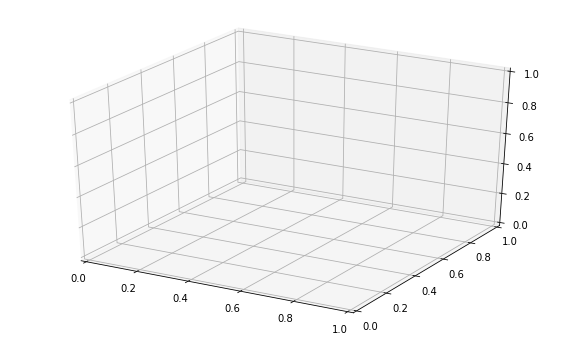

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

x = [val[0]['lr'] for val in bo_step1_expected.history]
y = [val[0]['momentum'] for val in bo_step1_expected.history]
z = [val[1] for val in bo_step1_expected.history]

img = ax.scatter(x, y, z, c=z, marker="o", cmap="coolwarm", depthshade=True)
plt.colorbar(img)
ax.set_xlabel('Learning rate',labelpad=10)
ax.set_ylabel('Momentum',labelpad=10)
ax.set_zlabel('Accuracy',labelpad=10)
ax.dist = 13

#### Plot best seen points during run

KeyError: ignored

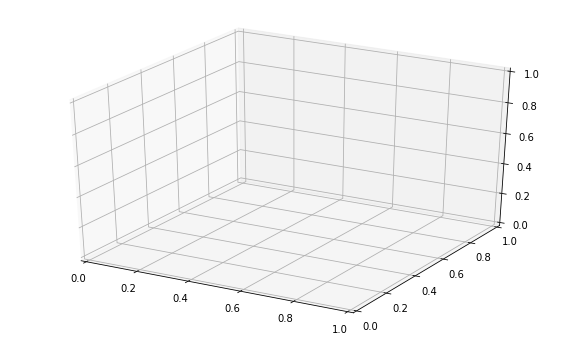

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

x = [val[0]['lr'] for val in bo_step1_expected.history]
y = [val[0]['momentum'] for val in bo_step1_expected.history]
z = [val[2] for val in bo_step1_expected.history]

img = ax.scatter(x, y, z, c=z, marker="o", cmap="coolwarm")
plt.colorbar(img,)
ax.set_xlabel('Learning rate',labelpad=10)
ax.set_ylabel('Momentum',labelpad=10)
ax.set_zlabel('Accuracy',labelpad=10)
ax.dist = 13